In [1]:
# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the the benin dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv")

Understanding the Dataset

In [4]:
# Check the shape of the dataset
df.shape

(525600, 19)

In [5]:
# Print all the columns of the dataset
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [6]:
# Summary statistics for each column in the dataset
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
# Check for null values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
# Check for duplicate entries
df.duplicated().sum()

0

Data Preprocessing

In [9]:
# Remove the Comments column as it is an empty column
df = df.drop(columns=['Comments'])

In [10]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df['Timestamp']

0        2021-10-25 00:01:00
1        2021-10-25 00:02:00
2        2021-10-25 00:03:00
3        2021-10-25 00:04:00
4        2021-10-25 00:05:00
                 ...        
525595   2022-10-24 23:56:00
525596   2022-10-24 23:57:00
525597   2022-10-24 23:58:00
525598   2022-10-24 23:59:00
525599   2022-10-25 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

In [12]:
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
5,2021-10-25 00:06:00,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5
6,2021-10-25 00:07:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5
7,2021-10-25 00:08:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5
8,2021-10-25 00:09:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5
9,2021-10-25 00:10:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5


In [13]:
# Check for negative values in GHI, DNI, DHI
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

In [14]:
# Count the negative values in each column
negative_counts = negative_values[['GHI', 'DNI', 'DHI']].apply(lambda x: (x < 0).sum())

In [15]:
negative_counts

GHI    257385
DNI         0
DHI         0
dtype: int64

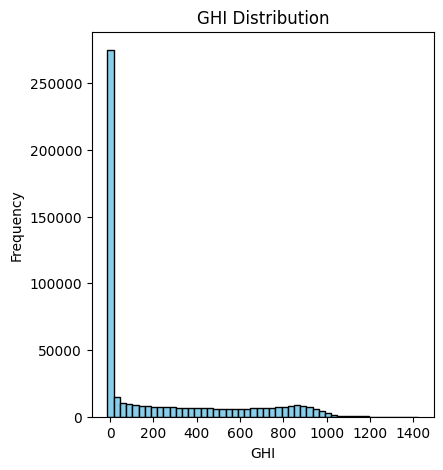

In [17]:
# Plot the distribution of GHI, DNI, DHI to inspect the data
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


In [18]:
# Inspect the times when negative values occur
negative_times = negative_values['Timestamp']
negative_counts, negative_times.head()

(GHI    257385
 DNI         0
 DHI         0
 dtype: int64,
 0   2021-10-25 00:01:00
 1   2021-10-25 00:02:00
 2   2021-10-25 00:03:00
 3   2021-10-25 00:04:00
 4   2021-10-25 00:05:00
 Name: Timestamp, dtype: datetime64[ns])

In [19]:
# Calculate the median of positive values only
ghi_median_pos = df.loc[df['GHI'] >= 0, 'GHI'].median()

In [20]:
# Output the positive medians for verification
print(f"GHI Median: {ghi_median_pos}")

GHI Median: 430.3


In [21]:
# Replace negative values with the median of the respective column
df['GHI'] = df['GHI'].apply(lambda x: ghi_median_pos if x < 0 else x)

In [22]:

# Optional: Print to confirm changes
print(df[['GHI', 'DNI', 'DHI']].head())

     GHI  DNI  DHI
0  430.3  0.0  0.0
1  430.3  0.0  0.0
2  430.3  0.0  0.0
3  430.3  0.0  0.0
4  430.3  0.0  0.0


Explanatory Analysis

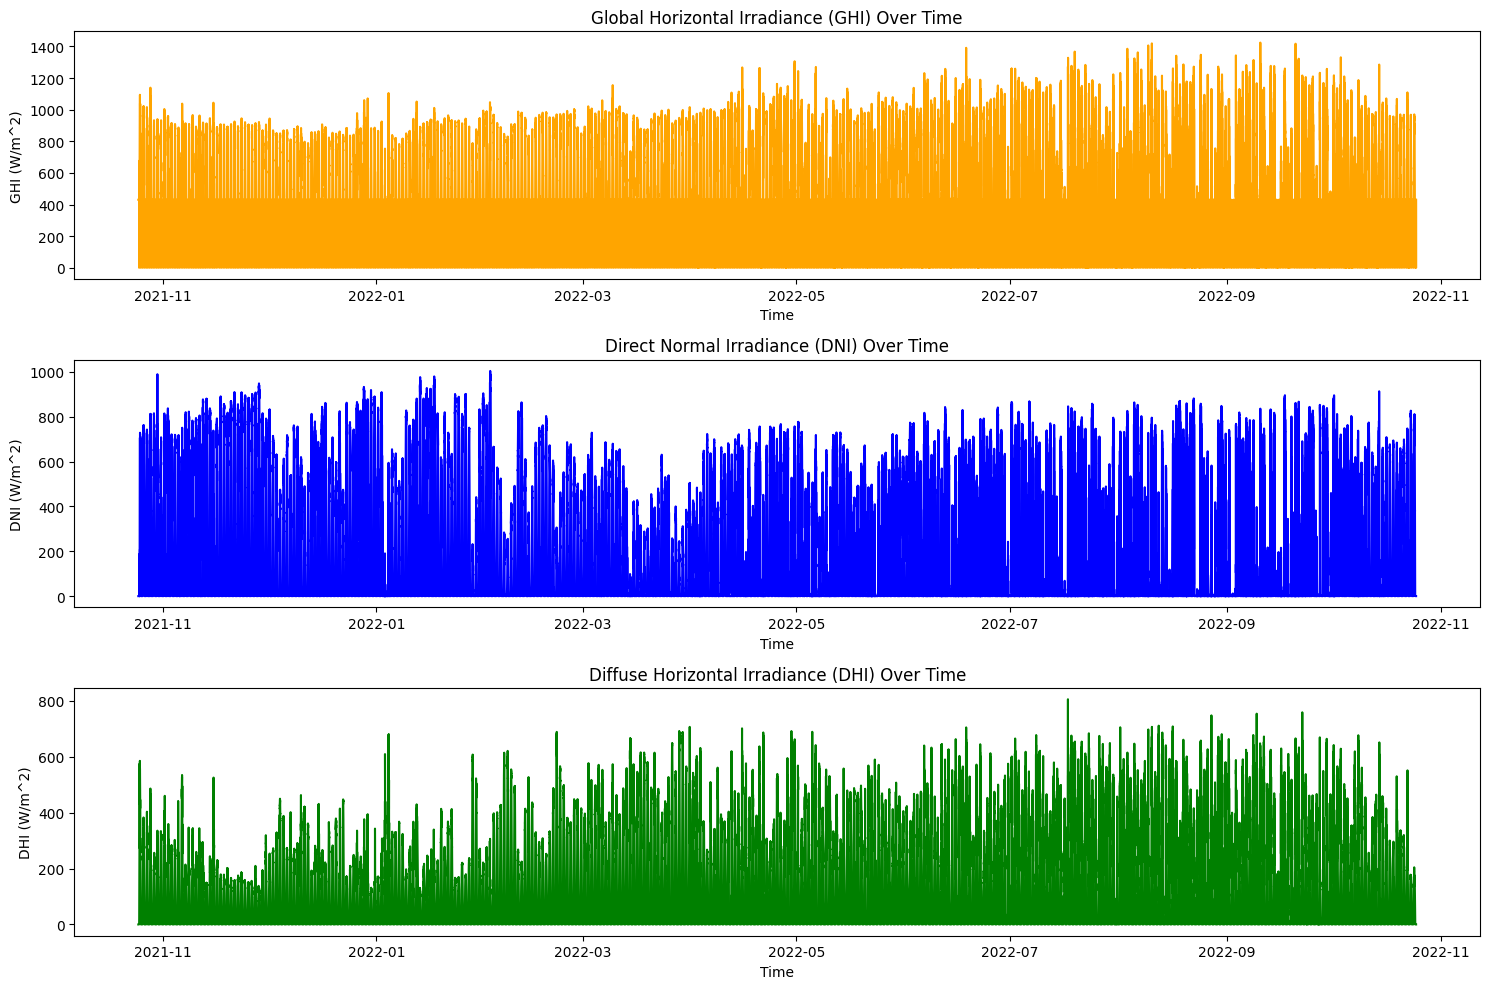

In [23]:
# Plotting GHI, DNI, and DHI over time
plt.figure(figsize=(15, 10))

# Plot Global Horizontal Irradiance (GHI)
plt.subplot(3, 1, 1)
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m^2)')


# Plot Direct Normal Irradiance (DNI)
plt.subplot(3, 1, 2)
plt.plot(df['Timestamp'], df['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Time')
plt.ylabel('DNI (W/m^2)')


# Plot Diffuse Horizontal Irradiance (DHI)
plt.subplot(3, 1, 3)
plt.plot(df['Timestamp'], df['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Time')
plt.ylabel('DHI (W/m^2)')

plt.tight_layout()
plt.show()

Statistical Analysis

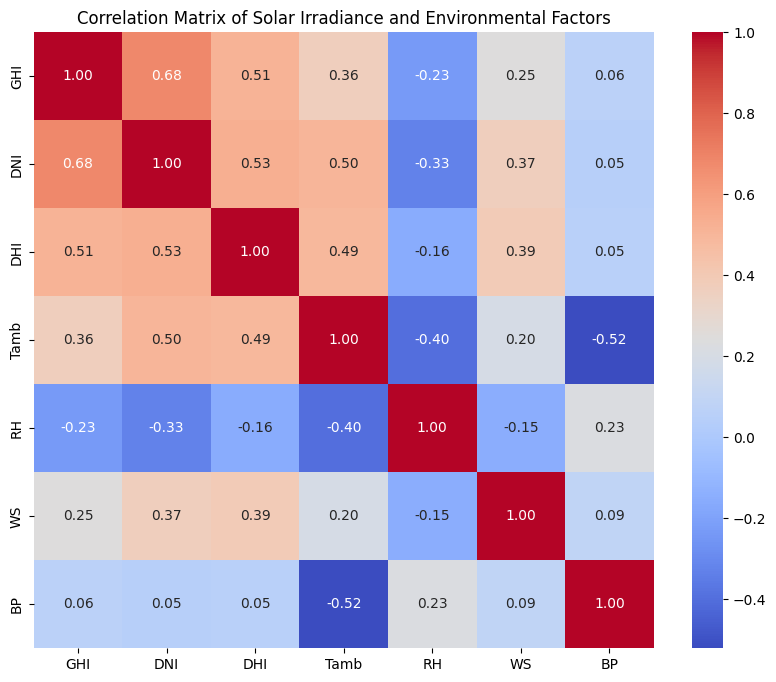

In [24]:
# Correlation analysis between GHI, DNI, DHI, and other environmental factors
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Solar Irradiance and Environmental Factors')
plt.show()

In [25]:
# Calculate monthly averages to analyze seasonal trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].mean()

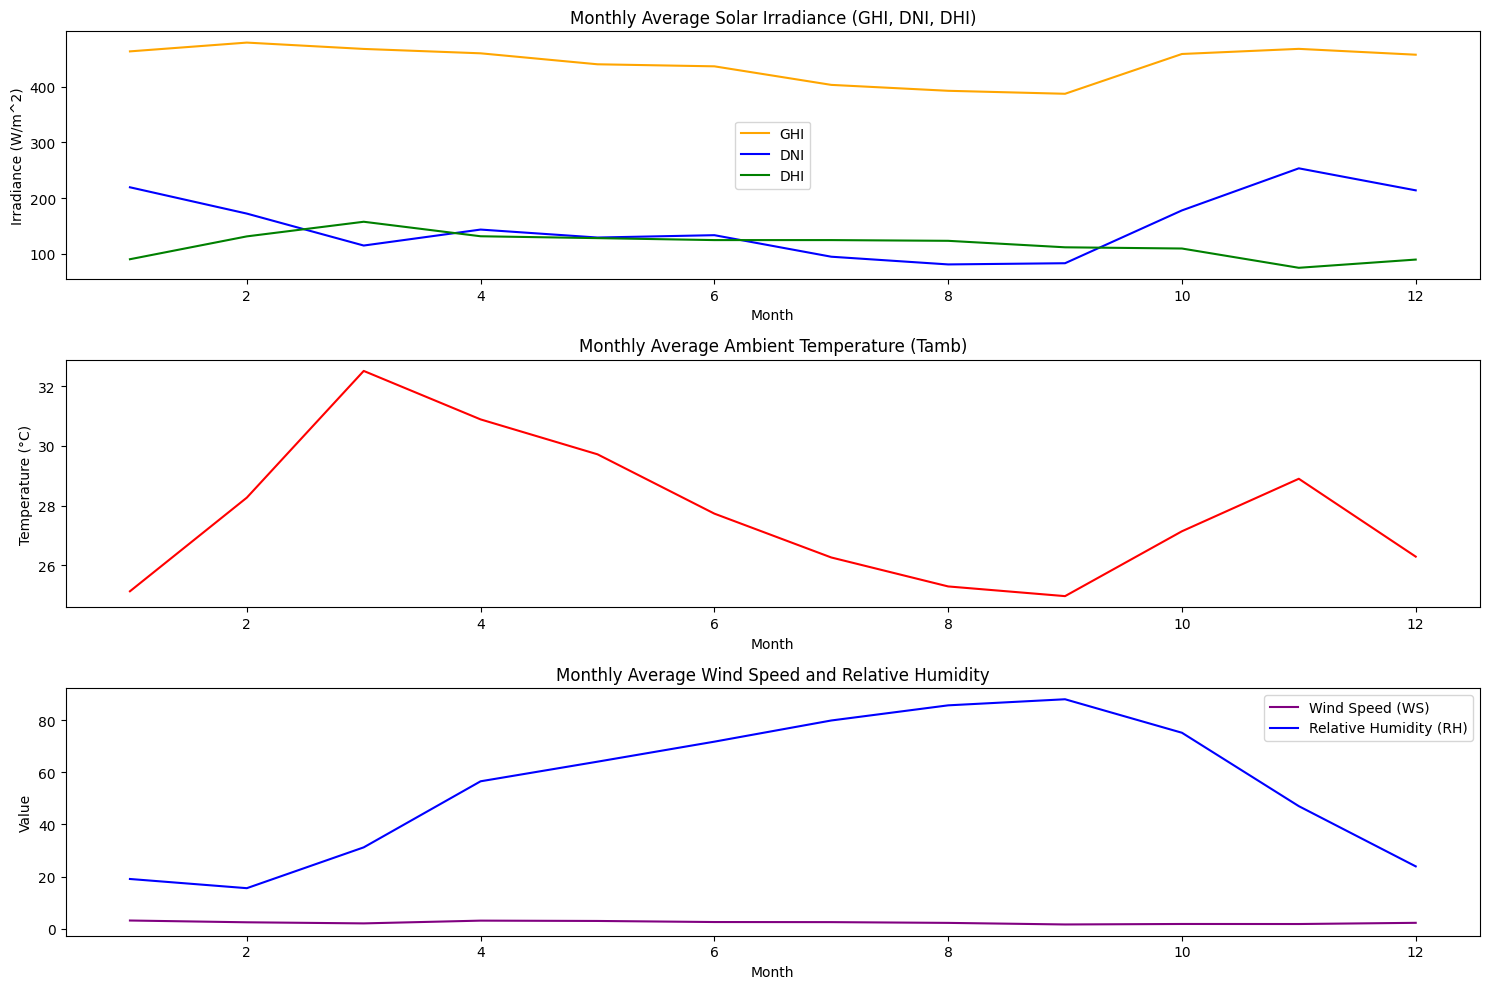

In [26]:
# Plotting seasonal trends
plt.figure(figsize=(15, 10))

# GHI, DNI, DHI monthly trends
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['GHI'], label='GHI', color='orange')
plt.plot(monthly_avg.index, monthly_avg['DNI'], label='DNI', color='blue')
plt.plot(monthly_avg.index, monthly_avg['DHI'], label='DHI', color='green')
plt.title('Monthly Average Solar Irradiance (GHI, DNI, DHI)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()

# Temperature (Tamb) monthly trend
plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Wind Speed (WS) and Humidity (RH) monthly trends
plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['WS'], label='Wind Speed (WS)', color='purple')
plt.plot(monthly_avg.index, monthly_avg['RH'], label='Relative Humidity (RH)', color='blue')
plt.title('Monthly Average Wind Speed and Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Summary statistics for key environmental factors
summary_stats = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].describe()
summary_stats

,GHI,DNI,DHI,Tamb,RH,WS,BP
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,442.435615,151.258469,116.444352,27.751788,55.013160,2.368093,975.915242
std,228.257286,250.956962,156.520714,4.758023,28.778732,1.462668,2.153977
min,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,968.000000
25%,418.175000,0.000000,0.000000,24.200000,26.500000,1.400000,975.000000
50%,430.300000,0.000000,2.500000,27.200000,59.300000,2.200000,976.000000
75%,442.400000,246.400000,215.700000,31.100000,80.800000,3.200000,977.000000
max,1424.000000,1004.500000,805.700000,41.400000,99.800000,16.100000,983.000000
